**Step 1: Data Preprocessing**

In [1]:
# This cell is for use with Google Colab
import os
# Find the latest version of spark 3.x  from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.5.0'
spark_version = 'spark-3.5.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [736 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,954 kB]
Get:13 http://archive.ubuntu.com/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from pyspark.sql import SparkSession  # Assuming PySpark is needed for Spark data retrieval

import requests

**Step 1: Data Preprocessing**

In [3]:
# Initialize a Spark session
spark = SparkSession.builder.appName("ConsumerCreditModel").getOrCreate()

In [4]:
import requests
from pyspark import SparkFiles

# Fetch CSV data from the URL
url = 'https://raw.githubusercontent.com/raniljoshua/Data-Analysis-Bootcamp_Project-4/main/project_Data_revised.csv'
r = requests.get(url)
open('temp.csv', 'wb').write(r.content)

# Add the downloaded CSV to Spark context
spark.sparkContext.addFile('temp.csv')

# Now read the CSV into a DataFrame
sdf = spark.read.csv(SparkFiles.get('temp.csv'), header=True, inferSchema=True)

In [5]:
# Convert the Spark DataFrame to a Pandas DataFrame
df = sdf.toPandas()

In [6]:
df

,YYYY-MM,"Total consumer credit owned and securitized, seasonally adjusted level",Interest Rate,Elections (yes/no),Inflation Rate,Unemployment Rate,Motor Vehicle Loans Owned and Securitized,Credit Cards and Other Revolving Plans,Student loans,Mortgages,Other
0,2000-06-01,1609548000000,6.08,1,3.7,4.0,546785000000,211498000000,0,0,851265000000
1,2000-07-01,1629751000000,6.07,1,3.7,4.0,565916000000,212011000000,0,0,851824000000
2,2000-08-01,1651615000000,6.22,1,3.4,4.1,573508000000,212542000000,0,0,865565000000
3,2000-09-01,1669001000000,6.07,1,3.5,3.9,579545000000,220120000000,0,0,869336000000
4,2000-10-01,1684599000000,6.12,1,3.4,3.9,581221000000,220460000000,0,0,882918000000
...,...,...,...,...,...,...,...,...,...,...,...
278,2023-08-01,4967956000000,5.37,0,3.7,3.8,1547710000000,999701000000,0,0,2420545000000
279,2023-09-01,4978098000000,5.46,0,3.7,3.8,1550870000000,1010776000000,0,0,2416452000000
280,2023-10-01,4985243000000,5.44,0,3.2,3.8,1558532000000,1016127000000,0,0,2410584000000
281,2023-11-01,5008723000000,5.16,0,3.1,3.7,1565873000000,1017511000000,0,0,2425339000000


In [7]:
df[df.index == 57]

,YYYY-MM,"Total consumer credit owned and securitized, seasonally adjusted level",Interest Rate,Elections (yes/no),Inflation Rate,Unemployment Rate,Motor Vehicle Loans Owned and Securitized,Credit Cards and Other Revolving Plans,Student loans,Mortgages,Other
57,2005-03-01,2220199000000,3.35,0,3.1,5.2,812373000000,301123000000,11867063974,253898403733,840937532293


In [8]:
# Convert YYYY-MM to datetime and set it as index
df['YYYY-MM'] = pd.to_datetime(df['YYYY-MM'])
df.set_index('YYYY-MM', inplace=True)

In [9]:
# Fill missing values
df.fillna(method='ffill', inplace=True)

In [10]:
# Normalize the data
scaler = StandardScaler()
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])

In [11]:
# Ensure the DataFrame does not include 2023 data for training
df_train = df[df.index < pd.to_datetime('2023-01-01')]

In [12]:
# Ensure the DataFrame only includes 2023 data for testing (predictions)
df_test = df[df.index >= pd.to_datetime('2023-01-01')]

In [13]:
# Normalize the data (you might want to fit the scaler only on the training data)
scaler = StandardScaler()
df_train.iloc[:, 1:] = scaler.fit_transform(df_train.iloc[:, 1:])
df_test.iloc[:, 1:] = scaler.transform(df_test.iloc[:, 1:])  # Only transform the test data

<ipython-input-13-c4abe9fc59f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.iloc[:, 1:] = scaler.fit_transform(df_train.iloc[:, 1:])
<ipython-input-13-c4abe9fc59f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.iloc[:, 1:] = scaler.transform(df_test.iloc[:, 1:])  # Only transform the test data


**Step 2: Exploratory Data Analysis (EDA)**

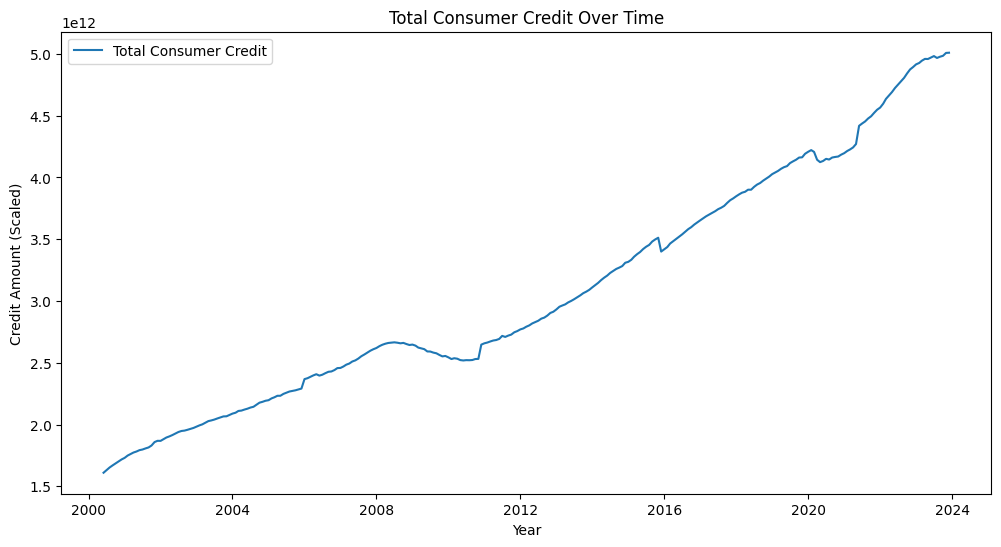

In [14]:
# Plot total consumer credit over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Total consumer credit owned and securitized, seasonally adjusted level'], label='Total Consumer Credit')
plt.title('Total Consumer Credit Over Time')
plt.xlabel('Year')
plt.ylabel('Credit Amount (Scaled)')
plt.legend()
plt.show()

In [15]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

                                                    Total consumer credit owned and securitized, seasonally adjusted level  \
Total consumer credit owned and securitized, se...                                           1.000000                        
Interest Rate                                                                               -0.106731                        
Elections (yes/no)                                                                          -0.096234                        
Inflation Rate                                                                               0.278921                        
Unemployment Rate                                                                           -0.277674                        
Motor Vehicle Loans Owned and Securitized                                                    0.967375                        
Credit Cards and Other Revolving Plans                                                       0.945322                 

In [16]:
df.corr()

,"Total consumer credit owned and securitized, seasonally adjusted level",Interest Rate,Elections (yes/no),Inflation Rate,Unemployment Rate,Motor Vehicle Loans Owned and Securitized,Credit Cards and Other Revolving Plans,Student loans,Mortgages,Other
"Total consumer credit owned and securitized, seasonally adjusted level",1.000000,-0.106731,-0.096234,0.278921,-0.277674,0.967375,0.945322,-0.154690,-0.185869,0.978206
Interest Rate,-0.106731,1.000000,0.000780,0.411591,-0.604145,0.032573,-0.226161,-0.158650,-0.021835,-0.105650
Elections (yes/no),-0.096234,0.000780,1.000000,-0.010201,0.068749,-0.099272,-0.093867,-0.088005,-0.093079,-0.067549
Inflation Rate,0.278921,0.411591,-0.010201,1.000000,-0.434618,0.393853,0.161393,-0.314929,-0.270081,0.300714
Unemployment Rate,-0.277674,-0.604145,0.068749,-0.434618,1.000000,-0.401735,-0.142016,0.255689,0.147859,-0.280096
Motor Vehicle Loans Owned and Securitized,0.967375,0.032573,-0.099272,0.393853,-0.401735,1.000000,0.865769,-0.298322,-0.285048,0.957337
Credit Cards and Other Revolving Plans,0.945322,-0.226161,-0.093867,0.161393,-0.142016,0.865769,1.000000,-0.068335,-0.124787,0.888453
Student loans,-0.154690,-0.158650,-0.088005,-0.314929,0.255689,-0.298322,-0.068335,1.000000,0.919790,-0.288114
Mortgages,-0.185869,-0.021835,-0.093079,-0.270081,0.147859,-0.285048,-0.124787,0.919790,1.000000,-0.341328
Other,0.978206,-0.105650,-0.067549,0.300714,-0.280096,0.957337,0.888453,-0.288114,-0.341328,1.000000


**Step 3: Data Normalization and Splitting**

In [17]:
# Exclude 2023 data for training
df_train = df[df.index < '2023-01-01']

In [18]:
# We will use the 2023 data as our test set to make predictions and compare
df_test = df[df.index > '2023-01-01']

In [19]:
df_test

,"Total consumer credit owned and securitized, seasonally adjusted level",Interest Rate,Elections (yes/no),Inflation Rate,Unemployment Rate,Motor Vehicle Loans Owned and Securitized,Credit Cards and Other Revolving Plans,Student loans,Mortgages,Other
YYYY-MM,,,,,,,,,,
2023-02-01,4927157000000,1.796109,-0.381771,1.898143,-1.113633,2.263449,1.744576,-1.208468,-1.132052,1.999296
2023-03-01,4945936000000,1.582079,-0.381771,1.347308,-1.164366,2.286015,1.772713,-1.208468,-1.132052,2.012450
2023-04-01,4960314000000,1.672197,-0.381771,1.292224,-1.215100,2.323302,1.836123,-1.208468,-1.132052,1.991586
2023-05-01,4959445000000,1.886227,-0.381771,0.796472,-1.062899,2.322254,1.864176,-1.208468,-1.132052,1.976724
2023-06-01,4971610000000,2.010140,-0.381771,0.245637,-1.113633,2.336923,1.897815,-1.208468,-1.132052,1.977734
2023-07-01,4983111000000,1.993242,-0.381771,0.355804,-1.164366,2.390604,1.914029,-1.208468,-1.132052,1.965159
2023-08-01,4967956000000,1.993242,-0.381771,0.631222,-1.012165,2.372211,1.939688,-1.208468,-1.132052,1.931153
2023-09-01,4978098000000,2.043934,-0.381771,0.631222,-1.012165,2.384523,1.986782,-1.208468,-1.132052,1.922701
2023-10-01,4985243000000,2.032669,-0.381771,0.355804,-1.012165,2.414375,2.009536,-1.208468,-1.132052,1.910584


In [20]:
# Normalize the features using StandardScaler
scaler = StandardScaler()

In [21]:
# Prepare features and target for training data
X_train = df_train.drop('Total consumer credit owned and securitized, seasonally adjusted level', axis=1)
y_train = df_train['Total consumer credit owned and securitized, seasonally adjusted level']

In [22]:
# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test = df_test.drop('Total consumer credit owned and securitized, seasonally adjusted level', axis=1)

In [23]:
X_test_scaled = scaler.transform(X_test)  # Use the same scaler to transform the test data
y_test_actual = df_test['Total consumer credit owned and securitized, seasonally adjusted level']  # This is actual data for comparison

In [24]:
df_train[df_train.index == '2020-11-01']

,"Total consumer credit owned and securitized, seasonally adjusted level",Interest Rate,Elections (yes/no),Inflation Rate,Unemployment Rate,Motor Vehicle Loans Owned and Securitized,Credit Cards and Other Revolving Plans,Student loans,Mortgages,Other
YYYY-MM,,,,,,,,,,
2020-11-01,4169805000000,-0.969385,2.619372,-0.745866,0.459114,1.116738,0.884309,-1.208468,-1.132052,1.460903


**Step 4: Model Implementation**

In [25]:
# Initialize the model
model = LinearRegression()

In [26]:
# Train the model with the scaled training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
# Make predictions with the scaled test data
y_pred = model.predict(X_test_scaled)

**Step 5: Model Optimization (this would involve hyperparameter tuning, feature engineering, etc.)**

In [28]:
# For now, we only have a simple linear regression model, so let's print out the coefficients:
print("Model coefficients:", model.coef_)

Model coefficients: [-6.52273087e-04 -2.44140625e-04 -3.05175781e-05 -7.32421875e-04
  2.27859742e+11  2.20316388e+11  5.89447988e+09  8.94039436e+10
  4.50673607e+11]


In [29]:
coef_dict = {}
for coef, feat in zip(model.coef_,X_test[:0]):
    coef_dict[feat] = coef
print(coef_dict)

{'Interest Rate': -0.000652273086771723, 'Elections (yes/no)': -0.000244140625, 'Inflation Rate': -3.0517578125e-05, 'Unemployment Rate': -0.000732421875, 'Motor Vehicle Loans Owned and Securitized': 227859742057.17444, 'Credit Cards and Other Revolving Plans': 220316388370.26282, 'Student loans': 5894479882.94339, 'Mortgages': 89403943591.27307, 'Other': 450673606701.9846}


In [30]:
# Make predictions for 2023
y_test_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [31]:
# Compare the predictions with the actual data for 2023
comparison_df = pd.DataFrame({'Actual': y_test_actual, 'Predicted': y_test_pred}, index=df_test.index)

# Calculate the 'Difference' column
comparison_df['Difference'] = comparison_df['Predicted'] - comparison_df['Actual']

# Calculate the 'Percentage of Discrepancy' column
comparison_df['Percentage of Discrepancy'] = (comparison_df['Difference'] / comparison_df['Actual']).abs() * 100


# Display the updated dataframe
comparison_df

,Actual,Predicted,Difference,Percentage of Discrepancy
YYYY-MM,,,,
2023-02-01,4927157000000,4.686005e+12,-2.411522e+11,4.894347
2023-03-01,4945936000000,4.703274e+12,-2.426620e+11,4.906290
2023-04-01,4960314000000,4.716337e+12,-2.439766e+11,4.918571
2023-05-01,4959445000000,4.715581e+12,-2.438637e+11,4.917157
2023-06-01,4971610000000,4.726790e+12,-2.448197e+11,4.924354
2023-07-01,4983111000000,4.736927e+12,-2.461841e+11,4.940369
2023-08-01,4967956000000,4.723063e+12,-2.448928e+11,4.929449
2023-09-01,4978098000000,4.732435e+12,-2.456629e+11,4.934874
2023-10-01,4985243000000,4.738790e+12,-2.464535e+11,4.943661


In [32]:
# Calculate and print R-squared on the training data for a sanity check
r2_train = r2_score(y_train, model.predict(X_train))
print(f"Training data R-squared: {r2_train}")

Training data R-squared: 0.9855801997414367


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [33]:
# Ensure the model meets the required performance threshold based on the training data
assert r2_train >= 0.80, "Model does not meet the required performance threshold based on the training data."



In [34]:
# Save the comparison metrics to a CSV file
comparison_df.to_csv('model_predictions_vs_actual.csv')